In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import sys,os
sys.path.append('../')
from collections import Counter

from copy import copy,deepcopy

import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from tqdm import tqdm_notebook as tqdm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,RobustScaler
from sklearn import preprocessing

from efcm.cluster import EFCM_LS1
from metrics import FMeasure, MPC, PE
from sklearn.metrics import adjusted_rand_score

### Load data

In [18]:
#### Data test Raw
dataset_names =['dataset_01_raw_test','dataset_02_raw_test','dataset_03_raw_test']
 
data_01 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[0], 'csv'])))
data_02 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[1], 'csv'])))
data_03 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[2], 'csv'])))

### View data

In [ ]:
data_01.head()

In [ ]:
data_02.head()

In [ ]:
data_03.head()

In [ ]:
print('Shape',data_01.shape,data_02.shape,data_03.shape)

In [19]:
X_data_01 = data_01.drop(columns='Target').values.copy()
y_data_01 = data_01.Target.values.copy()
X_data_02 = data_02.drop(columns='Target').values.copy()
y_data_02 = data_02.Target.values.copy()
X_data_03 = data_03.drop(columns='Target').values.copy()
y_data_03 = data_03.Target.values.copy()

In [5]:
try:
    assert y_data_01.all() == y_data_02.all() ==y_data_03.all()
    y = y_data_01
except:
    print('Target invalid')

### Parâmetros de T_u e T_V no diretório -- ../run_best_params

 - Dataset_01 : T_u=0.9  T_v=30.0
 - Dataset_02 : T_u=1.0  T_v=1000.0
 - Dataset_03 : T_u=5.0  T_v=10.0

### Evaluate

#### Dataset 1

In [98]:
clf1 = EFCM_LS1(n_cluster=7, theta_u=.9, theta_v=30.0, epsilon=1e-10, tol_iter=150, init='dirichlet')
u1 = []
epoch = 25 # mudar para 50
model1 = []
_ = [model1.append(deepcopy(clf1)) for _ in range(epoch)]
for j in range(epoch):
    model1[j].fit(X_data_01)
    print('run:{} loss: {} '.format(j,model1[j].loss))
    u1.append(model1[j].loss)

run:0 loss: 20.722397349590736 
run:1 loss: 19.771281834277566 
run:2 loss: 19.78146675795965 
run:3 loss: 19.643767361949987 
run:4 loss: 20.58621786514332 
run:5 loss: 20.627905669606644 
run:6 loss: 19.61080558070035 
run:7 loss: 19.626058892726533 
run:8 loss: 19.796190355572918 
run:9 loss: 19.774283933214313 
run:10 loss: 19.791092768334266 
run:11 loss: 19.77632093235727 
run:12 loss: 20.42023037788028 
run:13 loss: 19.77322025329328 
run:14 loss: 20.840373738267136 
run:15 loss: 19.614131251193584 
run:16 loss: 19.781130740399302 
run:17 loss: 20.08807083798514 
run:18 loss: 19.757702654036308 
run:19 loss: 19.790024409935256 
run:20 loss: 20.667585244630224 
run:21 loss: 20.66407789141805 
run:22 loss: 20.850803467512083 
run:23 loss: 19.774386144092333 
run:24 loss: 19.76383802329878 


In [99]:
u1 = np.array(u1)
np.argmin(u1),u1[np.argmin(u1)]

(6, 19.61080558070035)

In [100]:
fuzzy1 = model1[np.argmin(u1)].fuzzy_matrix
crisp1 = model1[np.argmin(u1)].labels_

In [132]:
print("Dataset 1:")
print("MPC: {}\tPE: {}".format(MPC(fuzzy1), PE(fuzzy1)))
print("ARS: {}\tFM: {}".format(adjusted_rand_score(y_data_01, crisp1), FMeasure(y_data_01, crisp1)))
print(Counter(crisp1))

Dataset 1:
MPC: 0.1783506661229117	PE: 1.4203949092730697
ARS: 0.05419033216363984	FM: 0.3143160086347862
Counter({0: 1114, 4: 315, 1: 218, 3: 189, 2: 122, 6: 117, 5: 25})


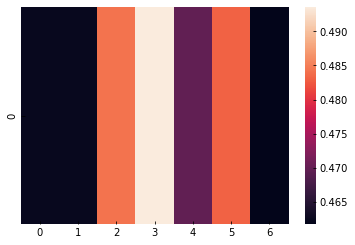

In [137]:
# Features importance
ax = sns.heatmap(model1[np.argmin(u1)].fuzzy_weight_matrix.T[0:1])
plt.show()

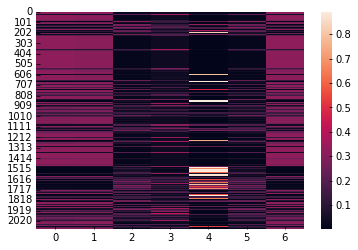

In [102]:
ax = sns.heatmap(fuzzy1)
plt.show()

In [103]:
model1[np.argmin(u1)].fuzzy_weight_matrix

array([[4.62411009e-01, 5.37588851e-01, 9.56616732e-08, 2.22044605e-16,
        4.40765441e-08, 2.22044605e-16],
       [4.62360008e-01, 5.37639883e-01, 6.66269674e-08, 2.22044605e-16,
        4.15574079e-08, 2.22044605e-16],
       [4.84237056e-01, 5.15532663e-01, 2.26760347e-04, 2.22044605e-16,
        3.52112565e-06, 2.22044605e-16],
       [4.93585241e-01, 5.06413905e-01, 8.50270790e-07, 2.22044605e-16,
        4.00148777e-09, 2.22044605e-16],
       [4.69780269e-01, 5.30217878e-01, 1.83021348e-06, 2.22044605e-16,
        2.25447461e-08, 2.22044605e-16],
       [4.83123074e-01, 5.16591062e-01, 2.81785587e-04, 2.22044605e-16,
        4.07893580e-06, 2.22044605e-16],
       [4.61709575e-01, 5.38290341e-01, 5.35240301e-08, 2.22044605e-16,
        3.01981370e-08, 2.22044605e-16]])

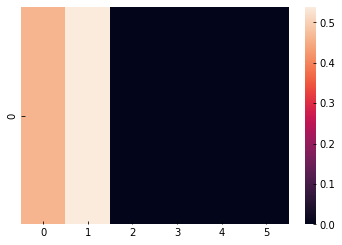

In [145]:
# Features importance
ax = sns.heatmap(model1[np.argmin(u1)].fuzzy_weight_matrix[6:].T.reshape(1,6))
plt.show()

#### Dataset 2

In [105]:
clf2 = EFCM_LS1(n_cluster=7,theta_u=1.0 ,theta_v=1000.0,epsilon=1e-10,tol_iter=150,init='dirichlet')
u2 = []
epoch = 25 # mudar para 50
model2 = []
_ = [model2.append(deepcopy(clf2)) for _ in range(epoch)]
for j in range(epoch):
    model2[j].fit(X_data_02)
    print('run:{} loss: {} '.format(j,model2[j].loss))
    u2.append(model2[j].loss)

run:0 loss: 2350.2681589154904 
run:1 loss: 2440.509213792671 
run:2 loss: 2472.9624978941883 
run:3 loss: 2511.635951361859 
run:4 loss: 2468.369226506689 
run:5 loss: 2453.006788503754 
run:6 loss: 2444.528688880225 
run:7 loss: 2601.5077986283277 
run:8 loss: 2319.775136176395 
run:9 loss: 2031.312676700416 
run:10 loss: 2525.9382320596337 
run:11 loss: 2514.082498694533 
run:12 loss: 1934.1636934314608 
run:13 loss: 2039.8319919544674 
run:14 loss: 2472.833143334327 
run:15 loss: 2354.0139195798656 
run:16 loss: 2504.647245544054 
run:17 loss: 2241.9078392682914 
run:18 loss: 2018.7555682986722 
run:19 loss: 2595.4096110840783 
run:20 loss: 2274.089586934749 
run:21 loss: 2440.6458953855868 
run:22 loss: 2167.697040593805 
run:23 loss: 2406.519783720799 
run:24 loss: 2455.403506467522 


In [106]:
fuzzy2 = model2[np.argmin(u2)].fuzzy_matrix
crisp2 = model2[np.argmin(u2)].labels_

In [108]:
print("Dataset 2:")
print("MPC: {}\tPE: {}".format(MPC(fuzzy2), PE(fuzzy2)))
print("ARS: {}\tFM: {}".format(adjusted_rand_score(y_data_02, crisp2), FMeasure(y_data_02, crisp2)))
print(Counter(crisp2))

Dataset 2:
MPC: 0.06491066587792699	PE: 1.8169826346286733
ARS: 0.007141284281009204	FM: 0.2521134965614153
Counter({0: 1893, 5: 50, 6: 48, 1: 38, 3: 35, 4: 29, 2: 7})


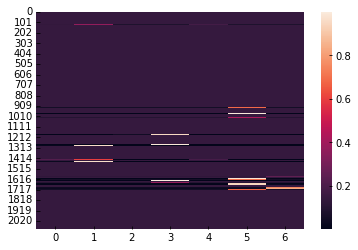

In [146]:
ax = sns.heatmap(fuzzy2)
plt.show()

In [110]:
model2[np.argmin(u2)].fuzzy_weight_matrix

array([[1.70543361e-04, 3.14343279e-04, 2.95994615e-05, 2.60220890e-04,
        4.08151850e-02, 3.99333161e-03, 3.28430287e-02, 3.87305037e-05,
        5.07453057e-01, 4.14081961e-01],
       [1.70388394e-04, 3.27337335e-04, 3.12721535e-05, 2.68604453e-04,
        4.10447968e-02, 4.08500025e-03, 3.43317415e-02, 4.04498808e-05,
        5.06330635e-01, 4.13369775e-01],
       [1.73635158e-04, 2.69692011e-04, 2.46173265e-05, 2.25655604e-04,
        3.89820032e-02, 3.86534045e-03, 3.01335044e-02, 3.20748515e-05,
        5.10372472e-01, 4.15921005e-01],
       [1.43537403e-04, 2.51439108e-04, 2.43736126e-05, 2.42769115e-04,
        3.94194003e-02, 3.76634933e-03, 3.16572721e-02, 3.11255122e-05,
        5.09173544e-01, 4.15290189e-01],
       [1.56699079e-04, 2.90570443e-04, 2.83892260e-05, 2.64619387e-04,
        4.07987656e-02, 4.02609449e-03, 3.49913386e-02, 3.71050206e-05,
        5.06186892e-01, 4.13219526e-01],
       [3.54645859e-06, 1.13020537e-05, 4.76377006e-07, 1.09822256e-05,
   

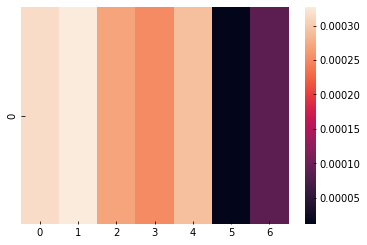

In [166]:
# Features importance
ax = sns.heatmap(model2[np.argmin(u2)].fuzzy_weight_matrix.T[1:2])
plt.show()

#### Dataset 3

In [168]:
clf3 = EFCM_LS1(n_cluster=7,theta_u=3.0 ,theta_v=10.0,epsilon=1e-10,tol_iter=150,init='dirichlet')
u3 = []
epoch = 3 # mudar para 50
model3 = []
_ = [model3.append(deepcopy(clf3)) for _ in range(epoch)]
for j in range(epoch):
    model3[j].fit(X_data_02)
    print('run:{} loss: {} '.format(j,model3[j].loss))
    u3.append(model3[j].loss)

run:0 loss: 358.6737904722059 
run:1 loss: 357.2774929379744 
run:2 loss: 358.6905525940634 


In [169]:
fuzzy3 = model3[np.argmin(u3)].fuzzy_matrix
crisp3 = model3[np.argmin(u3)].labels_

In [170]:
print("Dataset 3:")
print("MPC: {}\tPE: {}".format(MPC(fuzzy3), PE(fuzzy3)))
print("ARS: {}\tFM: {}".format(adjusted_rand_score(y_data_03, crisp3), FMeasure(y_data_03, crisp3)))
print(Counter(crisp3))

Dataset 3:
MPC: 0.4940124210459478	PE: 0.9607257427064955
ARS: 0.22949278618427146	FM: 0.42223480495833815
Counter({4: 1190, 0: 909, 1: 1})


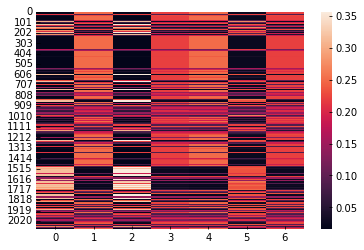

In [ ]:
ax = sns.heatmap(fuzzy3)
plt.show()

In [ ]:
model3[np.argmin(u3)].fuzzy_weight_matrix

array([[4.78348402e-01, 5.21633465e-01, 1.80408279e-05, 2.22044605e-16,
        9.22035528e-08, 2.22044605e-16],
       [4.71451872e-01, 5.28545448e-01, 2.18907270e-06, 2.22044605e-16,
        4.90847190e-07, 2.22044605e-16],
       [4.78532806e-01, 5.21450527e-01, 1.65684575e-05, 2.22044605e-16,
        9.81630412e-08, 2.22044605e-16],
       [4.70459364e-01, 5.29539511e-01, 9.08006366e-07, 2.22044605e-16,
        2.16673602e-07, 2.22044605e-16],
       [4.71451872e-01, 5.28545448e-01, 2.18907270e-06, 2.22044605e-16,
        4.90847190e-07, 2.22044605e-16],
       [4.77956198e-01, 5.22021940e-01, 2.18175795e-05, 2.22044605e-16,
        4.47389762e-08, 2.22044605e-16],
       [4.70459364e-01, 5.29539511e-01, 9.08006366e-07, 2.22044605e-16,
        2.16673602e-07, 2.22044605e-16]])

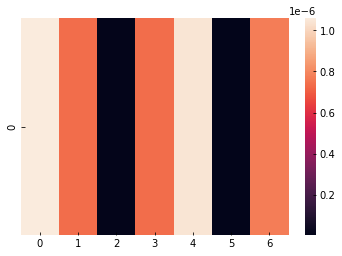

In [ ]:
# Features importance
ax = sns.heatmap(model3[np.argmin(u3)].fuzzy_weight_matrix.T[4:5])
plt.show()